In [2]:
from hestonpy.models.bates import Bates
from hestonpy.models.calibration.volatilitySmile import VolatilitySmile
from hestonpy.option.data import get_options_data, filter_data_for_maturity

import matplotlib.pyplot as plt

fontdict_title = {
    'fontsize': 20,
    'fontweight': 'bold'
}
from datetime import datetime
import numpy as np

# Calibration of Bates models on market data

We will calibrate our models on S&P smiles. You can also try with Apple, but there is less liquidity on the market, so less available maturities. Some parameters,

In [3]:
symbol = '^SPX'
all_market_data, spot, maturities = get_options_data(symbol)
if symbol == '^SPX':
    considered_maturities = [maturities[7], maturities[14], maturities[28], maturities[38]]
else:
    considered_maturities = [maturities[1], maturities[3], maturities[8], maturities[14]]
    
r = 0.00
params = {
    "vol_initial": 0.06,
    "kappa": 1.25,
    "theta": 0.06,
    "drift_emm": 0.00,
    "sigma": 0.6,
    "rho": -0.8,
    "lambda_jump": 1.0,
    "mu_J": -0.1,
    'sigma_J': 0.3
}

For each maturity/smile we filter the data (based on bid-ask spread, the moneyness etc.), then we calibrate with a local optimiser to initialise our global optimiser.

2025-04-15

Calibrated parameters:
 v0=0.223 | kappa=10.000 | theta=0.337 | sigma=4.583 | rho=-0.784  | lambda_jump=0.010  | mu_J=-0.042  | sigma_J=0.050

at minimum 0.182654 accepted 1
Parameters: kappa=10.000 | theta=0.337 | sigma=4.583 | rho=-0.784  | lambda_jump=0.010  | mu_J=-0.042  | sigma_J=0.050 

at minimum 0.146750 accepted 1
Parameters: kappa=10.000 | theta=0.001 | sigma=3.544 | rho=-0.738  | lambda_jump=0.367  | mu_J=-0.500  | sigma_J=0.050 

at minimum 0.150792 accepted 1
Parameters: kappa=10.000 | theta=0.002 | sigma=3.536 | rho=-0.739  | lambda_jump=0.434  | mu_J=-0.421  | sigma_J=0.155 

at minimum 0.146750 accepted 1
Parameters: kappa=10.000 | theta=0.001 | sigma=3.544 | rho=-0.738  | lambda_jump=0.367  | mu_J=-0.500  | sigma_J=0.050 

at minimum 0.151485 accepted 1
Parameters: kappa=10.000 | theta=0.008 | sigma=3.621 | rho=-0.735  | lambda_jump=0.371  | mu_J=-0.500  | sigma_J=0.058 

at minimum 0.146750 accepted 1
Parameters: kappa=10.000 | theta=0.001 | sigma=3.544 |

/home/theo/Documents/packages/hestonpy/src/hestonpy/models/blackScholes.py:140: RuntimeWarning: divide by zero encountered in divide
  d1 = (np.log(spot / strike) + (r + 0.5 * volatility**2) * time_to_maturity) / (


Calibrated parameters:
 v0=0.084 | kappa=1.733 | theta=0.382 | sigma=2.877 | rho=-0.866  | lambda_jump=1.918  | mu_J=-0.061  | sigma_J=0.050

at minimum 0.677344 accepted 1
Parameters: kappa=2.503 | theta=0.341 | sigma=3.738 | rho=-0.896  | lambda_jump=4.045  | mu_J=-0.039  | sigma_J=0.050 

at minimum 0.620353 accepted 1
Parameters: kappa=1.891 | theta=0.427 | sigma=3.897 | rho=-0.914  | lambda_jump=5.059  | mu_J=-0.037  | sigma_J=0.050 

at minimum 0.737909 accepted 1
Parameters: kappa=2.485 | theta=0.330 | sigma=3.583 | rho=-0.923  | lambda_jump=6.253  | mu_J=-0.001  | sigma_J=0.050 

at minimum 1.516186 accepted 1
Parameters: kappa=1.980 | theta=0.388 | sigma=3.353 | rho=-0.929  | lambda_jump=5.722  | mu_J=-0.017  | sigma_J=0.050 

['success condition satisfied'] True
Calibrated parameters:
 v0=0.084 | kappa=1.891 | theta=0.427 | sigma=3.897 | rho=-0.914  | lambda_jump=5.059  | mu_J=-0.037  | sigma_J=0.050

2026-01-16

Calibrated parameters:
 v0=0.070 | kappa=0.697 | theta=0.034 | 

/home/theo/Documents/packages/hestonpy/src/hestonpy/models/bates.py:271: RuntimeWarning: overflow encountered in exp
  (bj - rho * sigma * u * 1j + dj(u)) * tau - 2 * np.log((1 - gj(u) * np.exp(dj(u) * tau)) / (1 - gj(u)))
/home/theo/Documents/packages/hestonpy/src/hestonpy/models/bates.py:271: RuntimeWarning: invalid value encountered in scalar multiply
  (bj - rho * sigma * u * 1j + dj(u)) * tau - 2 * np.log((1 - gj(u) * np.exp(dj(u) * tau)) / (1 - gj(u)))
/home/theo/Documents/packages/hestonpy/src/hestonpy/models/bates.py:273: RuntimeWarning: overflow encountered in exp
  Dj = lambda tau, u: (bj - rho * sigma * u * 1j + dj(u)) / sigma**2 * (1 - np.exp(dj(u) * tau)) / (1 - gj(u) * np.exp(dj(u) * tau))
/home/theo/Documents/packages/hestonpy/src/hestonpy/models/bates.py:273: RuntimeWarning: invalid value encountered in scalar multiply
  Dj = lambda tau, u: (bj - rho * sigma * u * 1j + dj(u)) / sigma**2 * (1 - np.exp(dj(u) * tau)) / (1 - gj(u) * np.exp(dj(u) * tau))
/home/theo/Documents

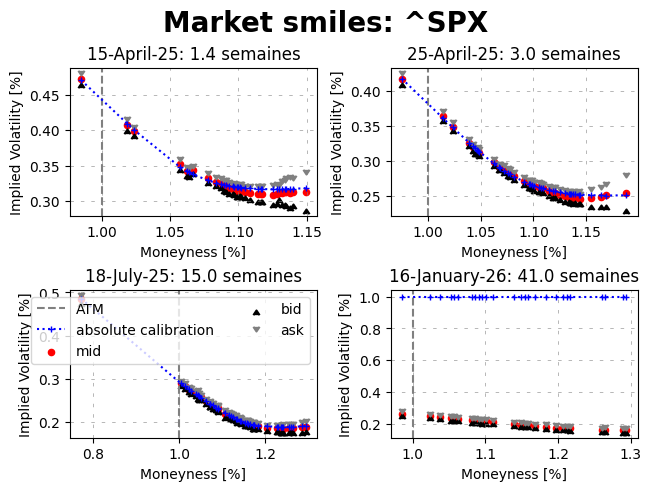

In [4]:
fig, axs = plt.subplots(2, 2, layout="constrained")
fig.suptitle(f'Market smiles: {symbol}', **fontdict_title)

############################################################
##### Absolute
############################################################
for maturity, ax in zip(considered_maturities, axs.flatten()):

    print("="*80)
    print(maturity)
    print("="*80,"\n")

    ####################################
    ### Getting and filtering data 
    ####################################

    full_market_data = filter_data_for_maturity(all_market_data, maturity)
    time_to_maturity = full_market_data['Time to Maturity'].iloc[0]
    strikes = full_market_data['Strike'].values
    bid_prices = full_market_data["Bid"].values
    ask_prices = full_market_data['Ask'].values
    market_ivs = full_market_data['Implied Volatility'].values
    market_prices = full_market_data['Call Price'].values

    marketVolatilitySmile = VolatilitySmile(
        strikes=strikes,
        time_to_maturity=time_to_maturity,
        atm=spot,
        market_ivs=market_ivs,
        r=r
    )
    market_data = marketVolatilitySmile.filters(full_market_data, select_mid_ivs=True)

    ####################################
    ### Calibration 
    ####################################
    bates = Bates(spot=spot, r=r, **params)
    initial_guess = [params['kappa'], params['theta'], params['sigma'], params['rho'], params['lambda_jump'], params['mu_J'], params['sigma_J']]
    initial_params = marketVolatilitySmile.calibration(
        price_function=bates.call_price,
        initial_guess=initial_guess,
        guess_correlation_sign='negative',
        speed='local',
    )

    initial_guess = [initial_params['kappa'], initial_params['theta'], initial_params['sigma'], initial_params['rho'], 
                    initial_params['lambda_jump'], initial_params['mu_J'], initial_params['sigma_J']]
    calibrated_params = marketVolatilitySmile.calibration(
        price_function=bates.call_price,
        guess_correlation_sign='negative',
        initial_guess=initial_guess,
        speed='global',
    )
    calibrated_prices = bates.call_price(
        strike=marketVolatilitySmile.strikes, time_to_maturity=time_to_maturity, **calibrated_params
    )
    calibrated_ivs = marketVolatilitySmile.compute_smile(prices=calibrated_prices)

    # Some plots
    ask_ivs = market_data['Ask ivs'].values
    bid_ivs = market_data['Bid ivs'].values
    forward = marketVolatilitySmile.atm * np.exp(marketVolatilitySmile.r * marketVolatilitySmile.time_to_maturity)

    if ax == axs.flatten()[-2]:
        ax.axvline(1, linestyle="--", color="gray", label="ATM")
        ax.plot(marketVolatilitySmile.strikes / forward, calibrated_ivs, label="absolute calibration", marker='+', color='blue', linestyle="dotted", markersize=4)
        ax.scatter(marketVolatilitySmile.strikes / forward, marketVolatilitySmile.market_ivs, label="mid", marker='o', color='red', s=20)
        ax.scatter(marketVolatilitySmile.strikes / forward, bid_ivs, label="bid", marker=6, color='black', s=20)
        ax.scatter(marketVolatilitySmile.strikes / forward, ask_ivs, label="ask", marker=7, color='gray', s=20)
        ax.legend(loc='upper right', ncol=2, alignment='left')
    else:
        ax.axvline(1, linestyle="--", color="gray")
        ax.plot(marketVolatilitySmile.strikes / forward, calibrated_ivs, marker='+', color='blue', linestyle="dotted", markersize=4)
        ax.scatter(marketVolatilitySmile.strikes / forward, marketVolatilitySmile.market_ivs, marker='o', color='red', s=20)
        ax.scatter(marketVolatilitySmile.strikes / forward, bid_ivs, marker=6, color='black', s=20)
        ax.scatter(marketVolatilitySmile.strikes / forward, ask_ivs, marker=7, color='gray', s=20)

    ax.set_xlabel("Moneyness [%]")
    ax.set_ylabel("Implied Volatility [%]")

    date = datetime.strptime(maturity, '%Y-%m-%d').date().strftime("%d-%B-%y")
    title = f"{date}: {marketVolatilitySmile.time_to_maturity * 252 / 5:.1f} semaines"
    ax.set_title(title)
    ax.grid(visible=True, which="major", linestyle="--", dashes=(5, 10), color="gray", linewidth=0.5, alpha=0.8)

plt.show()